# Bonus: Temperature Analysis I

In [97]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
# from datetime import datetime as dt


In [98]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()
#df.dtypes

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [99]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [100]:
# Set the date column as the DataFrame index
df.set_index('date',inplace=True)
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


### Compare June and December data across all years 

In [101]:
from scipy import stats

In [102]:
# Filter data for desired months

df_june = df.loc[pd.DatetimeIndex(df.index).month == 6]
df_june = df_june.dropna(subset=['tobs'])
df_june = df_june.sort_index()

df_dec = df.loc[pd.DatetimeIndex(df.index).month == 12]
df_dec = df_dec.dropna(subset=['tobs'])
df_dec = df_dec.sort_index()

In [103]:
# Identify the average temperature for June
avg_temp_june = df_june['tobs'].mean()
avg_temp_june = round(avg_temp_june,2)

print (f"The average temperature for June : {avg_temp_june}")


The average temperature for June : 74.94


In [104]:
# Identify the average temperature for December
avg_temp_dec = df_dec['tobs'].mean()
avg_temp_dec = round(avg_temp_dec,2)

print (f"The average temperature for December : {avg_temp_dec}")


The average temperature for December : 71.04


In [105]:
# Create collections of temperature data
june_tobs_list = df_june['tobs'].to_list()
dec_tobs_list  = df_dec['tobs'].to_list()


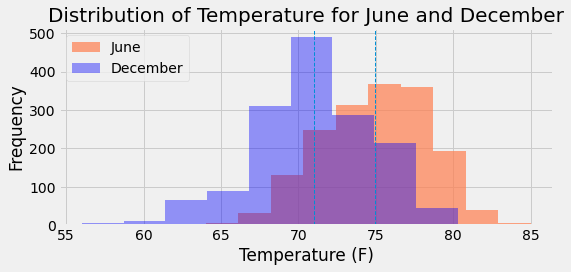

In [106]:
fig, ax = plt.subplots(figsize=(8,4))
ax = fig.gca()
df_june.hist(column=['tobs'], ax=ax, alpha=0.7, label="June", color="coral")
df_dec.hist(column=['tobs'], ax=ax, alpha=0.4, label="December", color="blue")
plt.axvline(avg_temp_june,  linestyle='dashed', linewidth=1)
plt.axvline(avg_temp_dec, linestyle='dashed', linewidth=1)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title(f"Distribution of Temperature for June and December", fontsize=20)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()   
    

In [107]:
# # Run paired t-test
# res =  stats.ttest_rel(june_tobs_list[0:1500], dec_tobs_list[0:1500])
# print(res)


In [108]:
res = stats.ttest_ind(june_tobs_list, dec_tobs_list, equal_var=False)
print(res)


Ttest_indResult(statistic=31.35503692096242, pvalue=4.193529835915755e-187)


### Analysis

* The p-value in this case is 4.193529835915755e-187, which is far less than the standard thresholds of 0.05 or 0.01. 
* Based on the p-value, it can be concluded that there is a statistically significant difference between the June temperature and the December temperature in the state of Hawaii.